---
# $\text{PARTE PRÁCTICA CORRESPONDIENTE AL SEGUNDO PARCIAL.}$
## $\text{Jonathan David Quintero Garzón - 2230980}$
## $\text{Mariangel Martinez Caicedo - 2221234}$
## $\text{Carol Silvana Sanabria Daza - 2210687}$
---
1.  Importados
2.   ¿Cómo se comporta la variable aleatoria de la edad de un padre de un recién nacido en Colombia (EDAD_PADRE)?
3.   ¿Cómo se comporta la variable aleatoria del número de embarazos incluido el presente
(N_EMB)?
4.   ¿Están correlacionadas y qué grado de correlación tienen ambas variables?
---

##$\text{1. Importados}$
---

In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import shapiro
import plotly.express as px
from scipy.stats import skew, kurtosis
from scipy.stats import pearsonr, spearmanr, kendalltau

In [32]:
from google.colab import files
uploaded = files.upload()

Saving nac2022 (1).csv to nac2022 (1) (2).csv


---
### **Prueba de una correcta carga de las variables**
---

In [33]:
io_csv = io.BytesIO(uploaded['nac2022 (1) (2).csv'])
tabla = pd.read_csv(io_csv, sep=',', index_col=0, encoding="latin-1")
tabla.head(3)

<ipython-input-33-45827a9cfdce>:2: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
8,638,1,1,NaN,1,4,4,2022,12,1,...,2,12/10/2015,2,2,2.0,29,3,8,1.0,1
11,1,1,1,NaN,1,6,5,2022,12,1,...,2,12/09/2012,2,1,1.0,24,4,11,1.0,1
27,1,1,1,NaN,2,6,5,2022,12,1,...,4,14/03/2019,4,2,2.0,25,3,9,1.0,1


In [34]:
df = tabla [["EDAD_PADRE","N_EMB"]]
df.head(3)

,EDAD_PADRE,N_EMB
COD_DPTO,,
8,29,2
11,24,2
27,25,4


In [35]:
df1 = df[(df.EDAD_PADRE < 100) & (df.N_EMB != 99 )]
df1.head(5)

,EDAD_PADRE,N_EMB
COD_DPTO,,
8,29,2
11,24,2
27,25,4
8,29,4
76,21,1


---
##$\text{2. ¿Cómo se comporta la variable aleatoria de la edad de un padre de un recién nacido en Colombia (EDAD_PADRE)?}$
*   Gráficos estadísticos.

*   Medidas descriptivas.
*   ¿Se cumple el supuesto de normalidad de la variable aleatoria?
---


### **Gráficos Estadísticos**
---

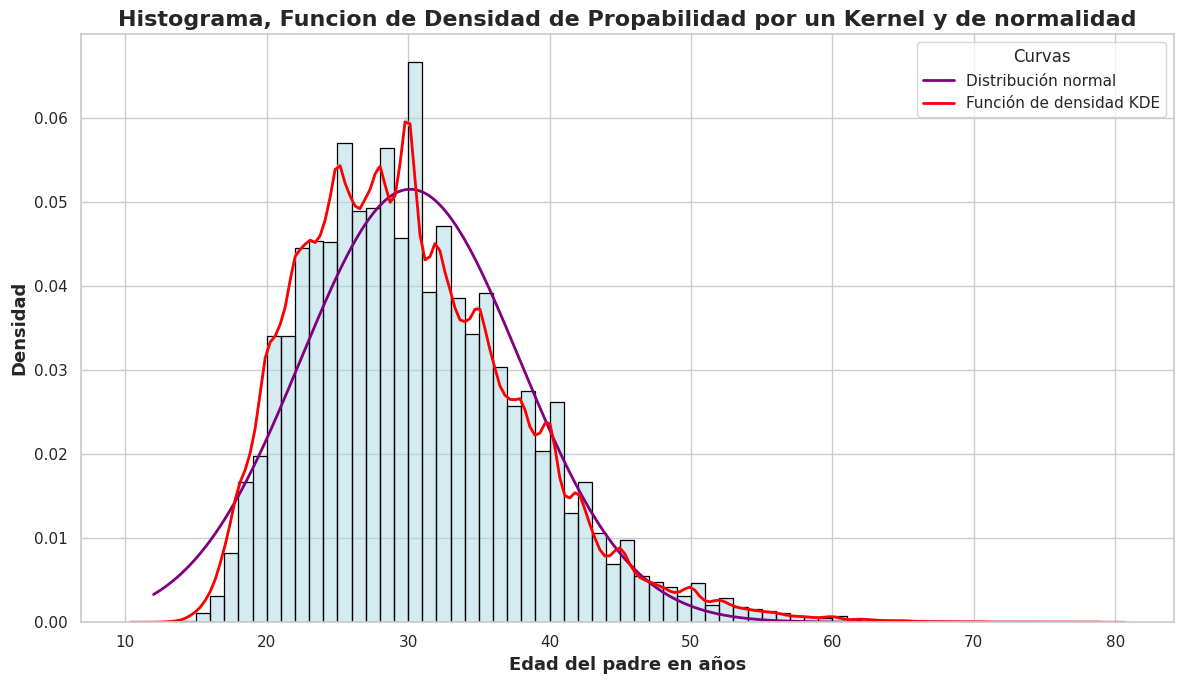

In [ ]:
sns.set(style="whitegrid")
intervalos1 = range(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE) + 1)
plt.figure(figsize=(12, 7))

sns.histplot(x=df1.EDAD_PADRE, bins=intervalos1,
             color="lightblue", edgecolor="black",
             kde=True, stat="density")

x = np.linspace(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE), 1000)
p = norm.pdf(x, np.mean(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE))
plt.plot(x, p, color="purple", linewidth=2, label="Distribución normal")

sns.kdeplot(df1.EDAD_PADRE, color="red", linewidth=2, label="Función de densidad KDE")

plt.title("Histograma, Funcion de Densidad de Propabilidad por un Kernel y de normalidad", fontsize=16, fontweight='bold')
plt.xlabel("Edad del padre en años", fontsize=13, fontweight='bold')
plt.ylabel("Densidad", fontsize=13, fontweight='bold')


plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(title="Curvas", title_fontsize=12, fontsize=11, loc='upper right')
plt.tight_layout()
plt.show()

Sea $X:=$ "Edad del padre de un recien nacido en Colombia".

Descriptivamente como la función de densidad de probabilidad de los datos estimada por un metodo Kernel (linea roja) no coincide con la funcion de densidad de probabilidad asumiendo el supuesto de normalidad (linea purpura). Es decir $X\sim \text{normal}(\text{Media} = \bar{x}, \text{varianza} = S^2x)$, entonces no se asume normalidad de acuerdo con las gráficas.

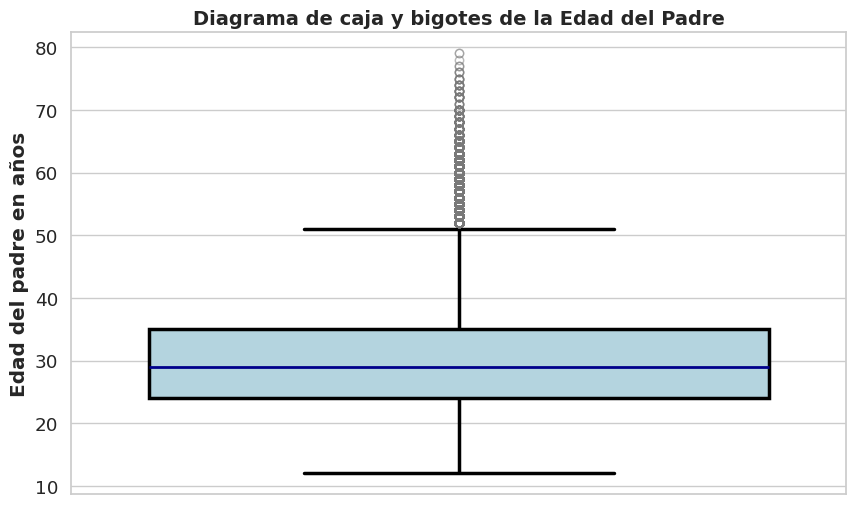

In [ ]:
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(10, 6))
sns.boxplot(
    y=df1.EDAD_PADRE,
    color="lightblue",
    linewidth=2.5,
    saturation=0.75,
    boxprops=dict(edgecolor='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    medianprops=dict(color='darkblue', linewidth=2),
    flierprops=dict(marker='o', color='gray', alpha=0.3))

plt.title("Diagrama de caja y bigotes de la Edad del Padre", fontweight='bold', fontsize=14)
plt.ylabel("Edad del padre en años", fontweight='bold')
plt.show()

Se considera que la edad de un padre de un recien nacido en Colombia es atípica si es mayor de 50 años. La media aritmética es cercana a la edad de 30 años.
El primer cuartil es aproximadamente 24 años y el tercer cuartil es aproximadamente 35 años.

Esto quiere decir que el $\text{Rango Intercuartílico = 35 - 24 = 11}$

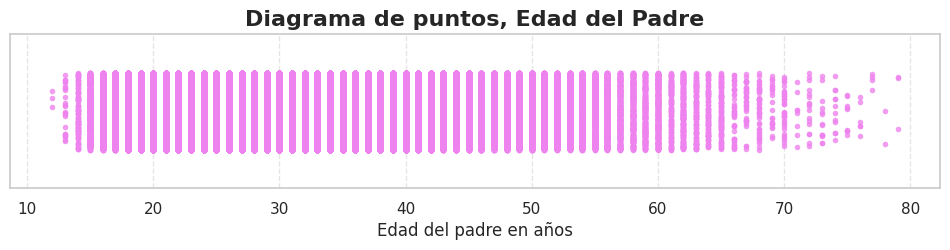

In [44]:
plt.figure(figsize=(12, 2))
sns.set(style="whitegrid")

sns.stripplot(
    x='EDAD_PADRE',
    data=df1,
    color='violet',
    size=4,
    alpha=0.8,
    jitter=0.25)

plt.title("Diagrama de puntos, Edad del Padre", fontsize=16, fontweight='bold')
plt.xlabel("Edad del padre en años", fontsize=12)
plt.yticks([])
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

De acuerdo al diagrama de puntos se observa una alta variabilidad en las edades del padre de un recien nacido en Colombia. Siendo asi que el padre mas joven registra una edad aproximada de 12 años, y el padre mas viejo registra una edad aproximada de 78 años.

---
### **Medidas Descriptivas**
---

In [ ]:
print(f"media: {np.mean(df1.EDAD_PADRE)}")
print(f"mediana: {np.median(df1.EDAD_PADRE)}")
print(f"varianza: {np.var(df1.EDAD_PADRE)}")
print(f"desviacion estandar: {np.std(df1.EDAD_PADRE)}")
print(f"Asimetría: {skew(df1.EDAD_PADRE)}")
print(f"Curtosis: {kurtosis(df1.EDAD_PADRE)}")

media: 30.14822726984775
mediana: 29.0
varianza: 59.92647978124465
desviacion estandar: 7.741219528035919
Asimetría: 0.7932633846824577
Curtosis: 0.8974404731370482


*   Aproximadamente el promedio de la edad de un padre de un bebe nacido vivo en el año 2022 fue de 30.14 años.
*   Aproximadamente la distancia entre los valores de la edad de un padre de un bebe nacido vivo en Colombia durant el año 2022 es de un 7.74 años.


*   El Coeficiente de Asimetría $ {0.7932633846824577 > 0}$, entonces  la distribución de la edad de un padre de un nacido vivo en Colombia durante el año 2022 es de una asimetrica positiva, es decir, la media es mayor que la moda de la variable aleatoria estudiada.
*   La curtosis, que es igual a ${0.8974404731370482 < 3}$, tiene una  distribución de la variable de tipo Platicúrtica, es decir, hay una menor concentración de las edades de un padre de un bebe nacido vivo en Colmbia durante al año 2022, con respecto a la media aritmética

---
###   **¿Se cumple el supuesto de normalidad de la variable aleatoria?**
---

Segun lo observado en el Histograma que contiene a las funciones de densidad de porbabilidad por un kernel y bajo normalidad, se concluyo que no se asume una distriubción normal de las edades de los padres. Se realizara entonces una prueba de confiabilidad shapiro-wilk para demostrar que la viariable no tienen una distribucion bajo normalidad.



1.   Si el **valor p** en esta prueba de hipótesis es menor que 0.05 se rechaza que la variable aleatoria $X:=$ "Edad del padre de un recien nacido en Colombia", presenta una distribución normal con una confianza del **95%**
2.   Si el **valor p** en esta prueba de hipótesis es mayor que 0.05 no se rechaza la variable aleatoria $X:=$ "Edad del padre de un recien nacido en Colombia", presenta una distribución normal con una confianza de **95%**




In [ ]:
shapiro(df1.EDAD_PADRE)

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 568276.



ShapiroResult(statistic=np.float64(0.9627145872200148), pvalue=np.float64(1.9188334613237818e-116))

Una vez realizada la prueba tenemos que el valor p (igual a $1.9188334613237818 \times 10^{-116})$ < 0.05, es decir, se rechaza que la variable aleatoria $X:=$ "Edad del padre de un recien nacido en Colombia", no presenta una distribución normal con una confianza del **95%**. Además, el sistema lanza esta advertencia:
*UserWarning: For N > 5000, computed p-value may not be accurate.*

Eso significa que la prueba pierde precisión con muestras muy grandes, pero el valor p es tan pequeño que el resultado sigue siendo confiable en términos prácticos.

Se realizará a continuación una muestra del total de las edades para ver si se cumple o no una distribución de tipo normal por parte de la variable.

In [ ]:
df1.EDAD_PADRE.count()
len(df1.EDAD_PADRE)

568276

In [ ]:
idx = np.random.randint(len(df1.EDAD_PADRE), size=100)
idx
shapiro(df1.EDAD_PADRE.index[idx])

ShapiroResult(statistic=np.float64(0.8279003494414308), pvalue=np.float64(1.96250965783664e-09))

Para este caso particular de la muestra, se tiene que el valor p (igual a $2.624074491854221 \times 10^{-8})$ < 0.05, entonces se rechaza que la variable aleatoria  $X:=$ "Edad del padre de un recien nacido en Colombia", presenta una distribución normal con una confianza del **95%**.

---
##$\text{3. ¿Cómo se comporta la variable aleatoria del número de embarazos incluido el presente (N_EMB)?}$
*   Gráficos estadísticos.

*   Medidas descriptivas.
*   ¿Se cumple el supuesto de normalidad de la variable aleatoria?
---

### **Gráficos estadísticos**
---

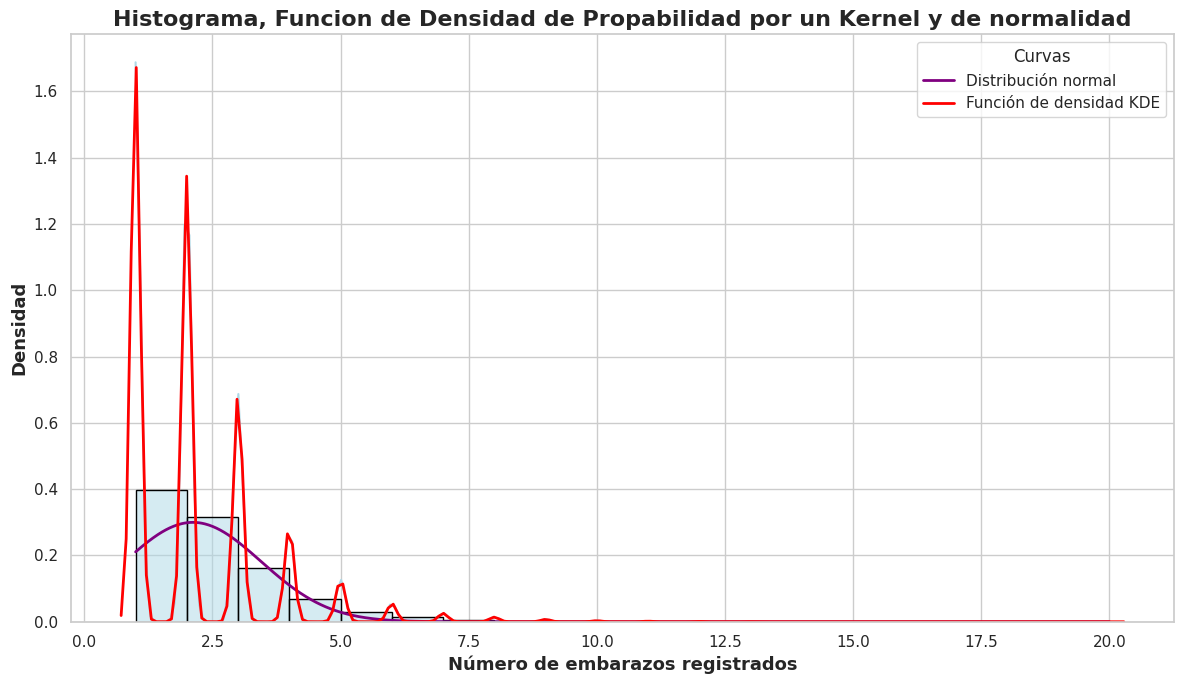

In [ ]:
sns.set(style="whitegrid")
intervalos = range(int(min(df1.N_EMB)), int(max(df1.N_EMB)) + 1)
plt.figure(figsize=(12, 7))

sns.histplot(x=df1.N_EMB, bins=intervalos,
             color="lightblue", edgecolor="black",
             kde=True, stat="density")

x = np.linspace(min(df1.N_EMB), max(df1.N_EMB), 1000)
p = norm.pdf(x, np.mean(df1.N_EMB), np.std(df1.N_EMB))
plt.plot(x, p, color="purple", linewidth=2, label="Distribución normal")

sns.kdeplot(df1.N_EMB, color="red", linewidth=2, label="Función de densidad KDE")

plt.title("Histograma, Funcion de Densidad de Propabilidad por un Kernel y de normalidad", fontsize=16, fontweight='bold')
plt.xlabel("Número de embarazos registrados", fontsize=13, fontweight='bold')
plt.ylabel("Densidad", fontsize=13, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Curvas", title_fontsize=12, fontsize=11, loc="upper right")
plt.tight_layout()
plt.show()

Sea $X:=$ "Número de embarazos, incluido el presente en Colombia".
Descriptivamente como la función de densidad de probabilidad de los datos estimada por un metodo Kernel (linea roja) no coincide en lo absoluto con la funcion de densidad de probabilidad asumiendo el supuesto de normalidad (linea purpura). Es decir $X\sim \text{normal}(\text{Media} = \bar{x}, \text{varianza} = S^2x)$, entonces se asume que no hay una distribución normal de los datos de acuerdo con las gráficas.

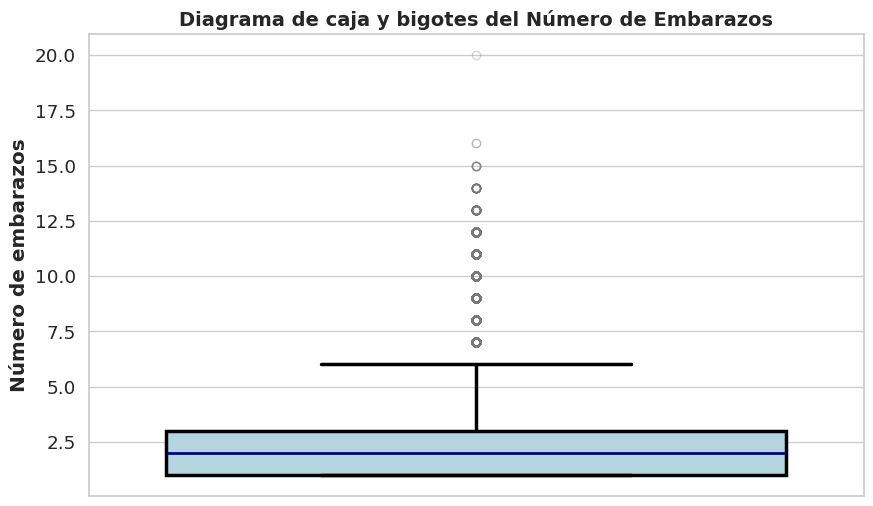

In [ ]:
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.boxplot(
    y=df1.N_EMB,
    color="lightblue",
    linewidth=2.5,
    saturation=0.75,
    boxprops=dict(edgecolor='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    medianprops=dict(color='darkblue', linewidth=2),
    flierprops=dict(marker='o', color='gray', alpha=0.3))

plt.title("Diagrama de caja y bigotes del Número de Embarazos", fontweight='bold', fontsize=14)
plt.ylabel("Número de embarazos", fontweight='bold')
plt.show()

Se considera que el numero de embarazos en Colombia es atípico si estos son mayor a 6 embarazos. La media aritmética es cercana a los 2.5 embarazos.
El primer cuartil es aproximadamente de 1 embarazo y el tercer cuartil es aproximadamente de 3 embarazos.

Esto quiere decir que el $\text{Rango Intercuartílico = 3 - 1 = 2}$

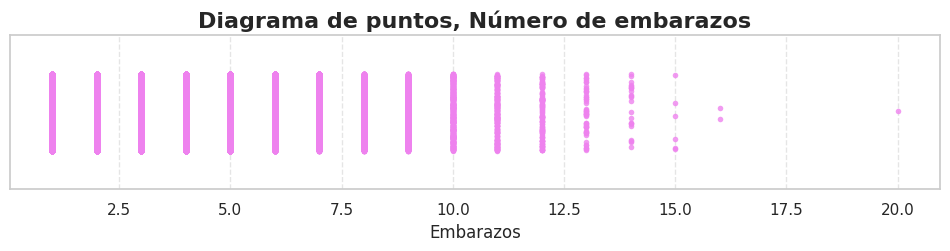

In [45]:
plt.figure(figsize=(12, 2))
sns.set(style="whitegrid")

sns.stripplot(
    x="N_EMB",
    data=df1,
    color='violet',
    size=4,
    alpha=0.8,
    jitter=0.25)

plt.title("Diagrama de puntos, Número de embarazos", fontsize=16, fontweight='bold')
plt.xlabel("Embarazos", fontsize=12)
plt.yticks([])
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

De acuerdo al diagrama de puntos se observa una baja variabilidad en el número de embarazos, incluido el presente en Colombia. Siendo asi que el valor para el menor numero de embarazos es aproximadamente 1, y el mayor número de embarazos registrados es 20.

---
### **Medidas descriptivas**
---

In [ ]:
print(f"media: {np.mean(df1.N_EMB)}")
print(f"mediana: {np.median(df1.N_EMB)}")
print(f"varianza: {np.var(df1.N_EMB)}")
print(f"desviacion estandar: {np.std(df1.N_EMB)}")
print(f"Asimetría: {skew(df1.N_EMB)}")
print(f"Curtosis: {kurtosis(df1.N_EMB)}")

media: 2.1172476050369893
mediana: 2.0
varianza: 1.7708594227426895
desviacion estandar: 1.3307364212129649
Asimetría: 1.914832955537591
Curtosis: 5.941785429223298


*   Aproximadamente el promedio del número de embarazos en Colombia durante el año 2022 fue de 2.11 embarazos.
*   Aproximadamente la distancia entre los valores del número de embarazos en Colombia durant el año 2022 es de 1.33 embarazos.


*   El Coeficiente de Asimetría $ {1.914832955537591 > 0}$, entonces  la distribución del número de embarazos en Colombia durante el año 2022 es de una asimetrica positiva, es decir, la media es mayor que la moda de la variable aleatoria estudiada.
*   La curtosis, que es igual a ${5.941785429223298 > 3}$, tiene una  distribución de la variable de tipo Leptocúrtica, es decir, hay una mayor concentración en el número de embarazos en Colmbia durante al año 2022, con respecto a la media aritmética.

---
### **¿Se cumple el supuesto de normalidad de la variable aleatoria?**
---

Segun lo observado en el Histograma que contiene a las funciones de densidad de probabilidad por un kernel y bajo normalidad, se concluyo que no se asume una distriubción normal del número de embarazos. Se realizara entonces una prueba de confiabilidad shapiro-wilk para demostrar que la viariable no tienen una distribucion bajo normalidad.



1.   Si el **valor p** en esta prueba de hipótesis es menor que 0.05 se rechaza que la variable aleatoria $X:=$ Número de embarazos, incluido el presente en Colombia, presenta una distribución normal con una confianza del **95%**
2.   Si el **valor p** en esta prueba de hipótesis es mayor que 0.05 no se rechaza la variable aleatoria $X:=$ Número de embarazos, incluido el presente en Colombia., presenta una distribución normal con una confianza de **95%**

In [ ]:
shapiro(df1.N_EMB)

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 568276.



ShapiroResult(statistic=np.float64(0.7748883302311607), pvalue=np.float64(5.416775721566683e-173))

Una vez realizada la prueba tenemos que el valor p (igual a $5.416775721566683 \times 10^{-173})$ < 0.05, es decir, se rechaza que la variable aleatoria $X:=$ Número de embarazos, incluido el presente en Colombia, presenta una distribución normal con una confianza del **95%**. Ademas Además, el sistema lanza esta advertencia:
*UserWarning: For N > 5000, computed p-value may not be accurate.*

Eso significa que la prueba pierde precisión con muestras muy grandes, pero el valor p es tan pequeño que el resultado sigue siendo confiable en términos prácticos.

Se realizara a continuación una muestra del total de las edades para ver si se cumple o no una distribución de tipo normal por parte de la variable.

In [ ]:
df1.N_EMB.count()
len(df1.N_EMB)

568276

In [ ]:
idx = np.random.randint(len(df1.N_EMB), size=100)
idx
shapiro(df1.N_EMB.index[idx])

ShapiroResult(statistic=np.float64(0.885564874412531), pvalue=np.float64(3.145201546185369e-07))

Para este caso particular de la muestra, se tiene que el valor p (igual a $3.145201546185369 \times 10^{-7})$ < 0.05, enotnces se rechaza que la variable aleatoria $X:=$ Número de embarazos, incluido el presente en Colombia, presenta una distribución normal con una confianza del **95%**.

## $\text{4.   ¿Están correlacionadas y qué grado de correlación tienen ambas variables?}$

---
### **Diagrama de dispersión**
---

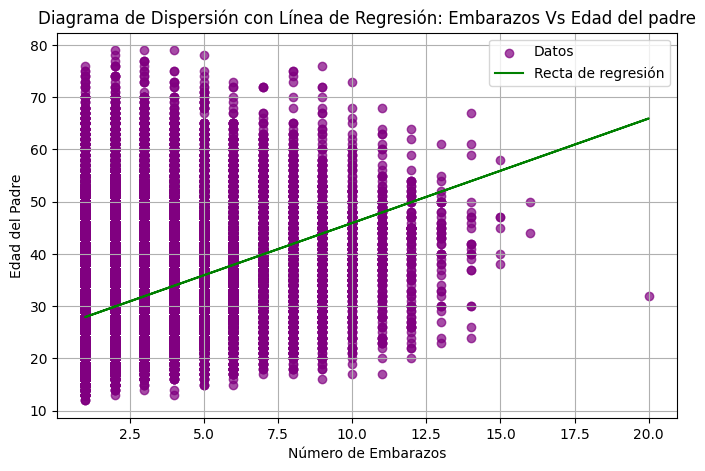

In [ ]:

x = df1.N_EMB
y = df1.EDAD_PADRE
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='purple', alpha=0.7, label='Datos')
plt.plot(x, poly1d_fn(x), color='green', label='Recta de regresión')
plt.title('Diagrama de Dispersión con Línea de Regresión: Embarazos Vs Edad del padre')
plt.xlabel('Número de Embarazos')
plt.ylabel('Edad del Padre')
plt.grid(True)
plt.legend()
plt.show()

El diagrama de dispersión muestra la relación entre el número de embarazos y la edad del padre, junto con una línea de regresión que indica una tendencia general positiva. Esta pendiente sugiere que, en promedio, a mayor número de embarazos, mayor es la edad del padre. Sin embargo, la dispersión de los puntos alrededor de la recta refleja una correlación débil o moderada, lo que indica que aunque existe una tendencia creciente, no es una relación estrictamente lineal. Es decir, la edad del padre no determina con precisión el número de embarazos, ya que hay una considerable variabilidad entre los datos.

---
### **Coeficientes de correlación de Pearson, de Kendall y de Spearman**
---

In [ ]:
pearson_corr, _ = pearsonr(df1.N_EMB, df1.EDAD_PADRE)
spearman_corr, _ = spearmanr(df1.N_EMB, df1.EDAD_PADRE)
kendall_corr, _ = kendalltau(df1.N_EMB, df1.EDAD_PADRE)

print(f"Coeficiente de correlación de Pearson: {pearson_corr}")
print(f"Coeficiente de correlación de Spearman: {spearman_corr}")
print(f"Coeficiente de correlación de Kendall: {kendall_corr}")



Coeficiente de correlación de Pearson: 0.34399497109882465
Coeficiente de correlación de Spearman: 0.3709076724499916
Coeficiente de correlación de Kendall: 0.28930213851230707


Al analizar la relación entre el número de embarazos (N_EMB) y la edad del padre (EDAD_PADRE), se obtuvieron tres coeficientes de correlación que permiten entender el tipo y la fuerza de dicha asociación. El coeficiente de correlación de Pearson fue de 0.344, lo que indica una relación lineal positiva débil a moderada, es decir, a medida que aumenta el número de embarazos, tiende a aumentar la edad del padre, aunque con bastante dispersión. Por su parte, el coeficiente de Spearman fue de 0.371, lo que refleja una relación monótona positiva moderada basada en rangos, sin necesidad de linealidad. Finalmente, el coeficiente de Kendall, con un valor de 0.289, también sugiere una relación monótona positiva moderada, aunque de forma más conservadora. En conjunto, estos resultados permiten concluir que existe una asociación positiva y moderada entre ambas variables, lo cual implica que, en general, los padres con más embarazos suelen tener mayor edad, aunque esta relación no es estrictamente lineal ni fuerte, debido a la dispersión de los datos.